# Mini Project 2

In [2]:
##Import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [3]:
#load data set
#Downloaded from Kaggle (https://www.kaggle.com/timmate/avocado-prices-2020)
df = pd.read_csv("avocado-2021.csv")

# Description of columns

# Data Preparation

In [4]:
#check record count, data types, columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33045 entries, 0 to 33044
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           33045 non-null  object 
 1   average_price  33045 non-null  float64
 2   total_volume   33045 non-null  float64
 3   4046           33045 non-null  float64
 4   4225           33045 non-null  float64
 5   4770           33045 non-null  float64
 6   total_bags     33045 non-null  float64
 7   small_bags     33045 non-null  float64
 8   large_bags     33045 non-null  float64
 9   xlarge_bags    33045 non-null  float64
 10  type           33045 non-null  object 
 11  year           33045 non-null  int64  
 12  geography      33045 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.3+ MB


In [5]:
#check top 5 records 
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [6]:
#convert date column into date type instead of keeping it as object
df['date'] = pd.to_datetime(df.date)

In [7]:
#check the top 5 records from the top of the dataframe
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [8]:
#sort the dataframe by date 
df.sort_values(by='date')

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
78,2015-01-04,1.13,109215.00,48285.15,37562.78,34.10,23332.97,21582.97,1750.00,0.00,conventional,2015,Roanoke
77,2015-01-04,1.54,4212.16,238.48,1678.83,372.55,1922.30,1570.28,352.02,0.00,organic,2015,Richmond/Norfolk
76,2015-01-04,1.13,182697.97,56293.75,80396.09,9762.41,36245.72,31778.36,4467.36,0.00,conventional,2015,Richmond/Norfolk
75,2015-01-04,2.01,3397.00,58.22,1493.90,772.21,1072.67,993.94,78.73,0.00,organic,2015,Raleigh/Greensboro
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32966,2020-11-29,1.20,5270.83,5.86,499.77,0.00,4765.20,4765.20,0.00,0.00,organic,2020,Grand Rapids
32965,2020-11-29,1.21,156868.20,17780.46,43514.67,44314.73,51258.34,39468.06,5111.72,6678.56,conventional,2020,Grand Rapids
32964,2020-11-29,1.36,19723.34,252.24,1364.20,0.00,18106.90,3864.71,14242.19,0.00,organic,2020,Detroit
32975,2020-11-29,0.78,200284.09,48129.95,37637.47,5118.56,109398.11,100336.24,3084.27,5977.60,conventional,2020,Indianapolis


In [9]:
#check for duplicated records
df.duplicated().sum()

0

In [10]:
#check for unique values in geography field
df['geography'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [11]:
#The Total U.S. data is somewhat aggregated for the following 8 geographical areas of the US: 
#California, Great Lakes, Midsouth, Northeast, Plains, Southeast, South Central, and West. 
#Remove records with geography eqaual to Total U.S.
df = df[df['geography'] != 'Total U.S.']

In [12]:
#Check for null values
df.isnull().sum()

date             0
average_price    0
total_volume     0
4046             0
4225             0
4770             0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
dtype: int64

In [13]:
#Check distribution of types of avocado
df['type'].value_counts()

conventional    16218
organic         16215
Name: type, dtype: int64

In [14]:
#add new columns month
df['month'] = pd.DatetimeIndex(df['date']).month

<Figure size 1152x720 with 0 Axes>

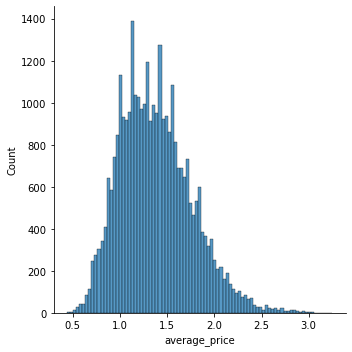

In [15]:
#Check distribution of average price of avocado 
plt.figure(figsize=(16, 10))
d_ap = sns.displot(data = df, x='average_price')
plt.show()

<Figure size 1152x720 with 0 Axes>

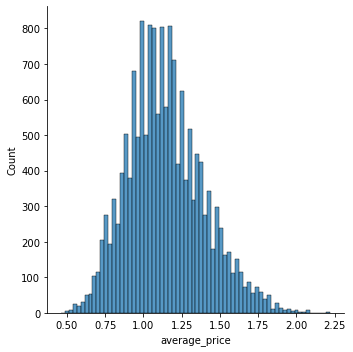

In [16]:
#Check distribution of average price of conventional avocado 
plt.figure(figsize=(16, 10))
conventional_df = df[df['type'] == 'conventional']
d_ap_c = sns.displot(data = conventional_df, x='average_price')
plt.show()

<Figure size 1152x720 with 0 Axes>

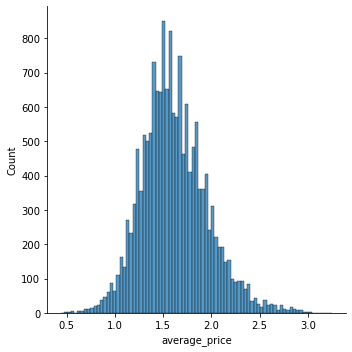

In [17]:
#Check distribution of average price of organic avocado 
plt.figure(figsize=(16, 10))
organic_df = df[df['type'] == 'organic']
d_ap_o = sns.displot(data = organic_df, x='average_price')
plt.show()

# Price Trend of Avocado

In [18]:
#Create a new dataframe that contains the average price of conventional avocado by month and year
conventional_df_avg_price_per_month = conventional_df.groupby(['month','year'], as_index=False)['average_price'].mean()

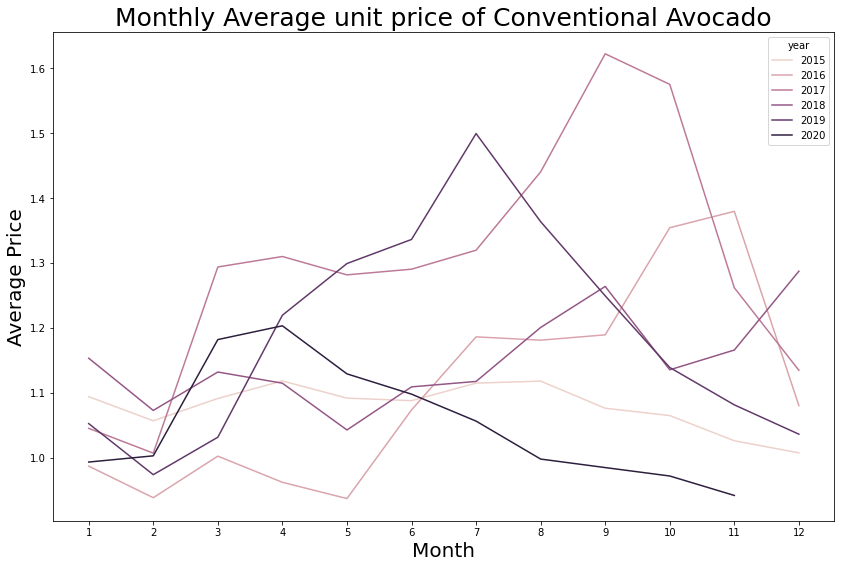

In [19]:
#Plot monthly average unit price of conventional avocado between six years period 
plt.figure(figsize=(14, 9))
lp = sns.lineplot(data=conventional_df_avg_price_per_month, x="month", y="average_price", hue="year")
lp.set_xlabel("Month", fontsize = 20)
lp.set_ylabel("Average Price", fontsize = 20)
lp.set_title("Monthly Average unit price of Conventional Avocado", fontsize = 25)

end_range = len(conventional_df_avg_price_per_month['month'].unique()) + 1
lp.set_xticks(range(1,end_range)) # <--- set the ticks first
lp.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

plt.show()

In [20]:
#Create a new dataframe that contains the average price of organic avocado by month and year
organic_df_avg_price_per_month = organic_df.groupby(['month','year'], as_index=False)['average_price'].mean()

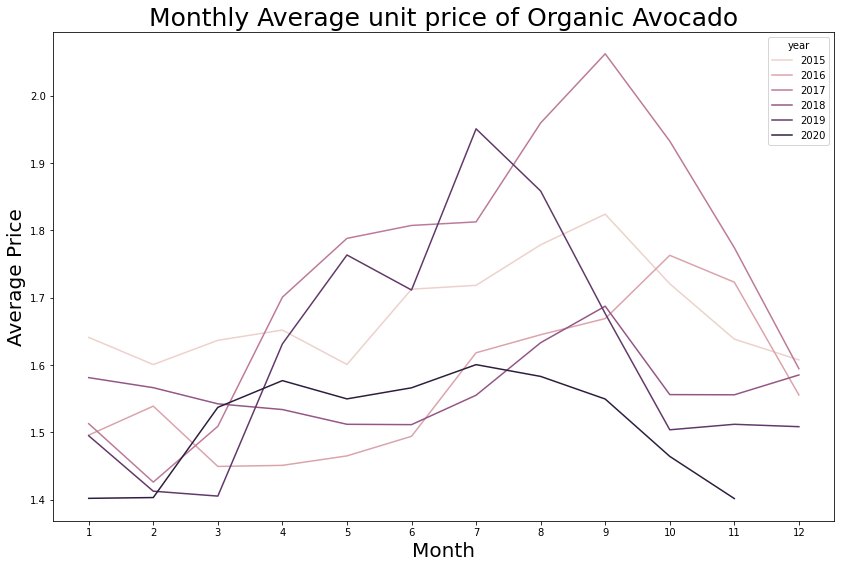

In [21]:
#Plot monthly average unit price of organic avocado between six years period 
plt.figure(figsize=(14, 9))
lp = sns.lineplot(data=organic_df_avg_price_per_month, x="month", y="average_price", hue="year")
lp.set_xlabel("Month", fontsize = 20)
lp.set_ylabel("Average Price", fontsize = 20)
lp.set_title("Monthly Average unit price of Organic Avocado", fontsize = 25)

end_range = len(conventional_df_avg_price_per_month['month'].unique()) + 1
lp.set_xticks(range(1,end_range)) # <--- set the ticks first
lp.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])

plt.show()

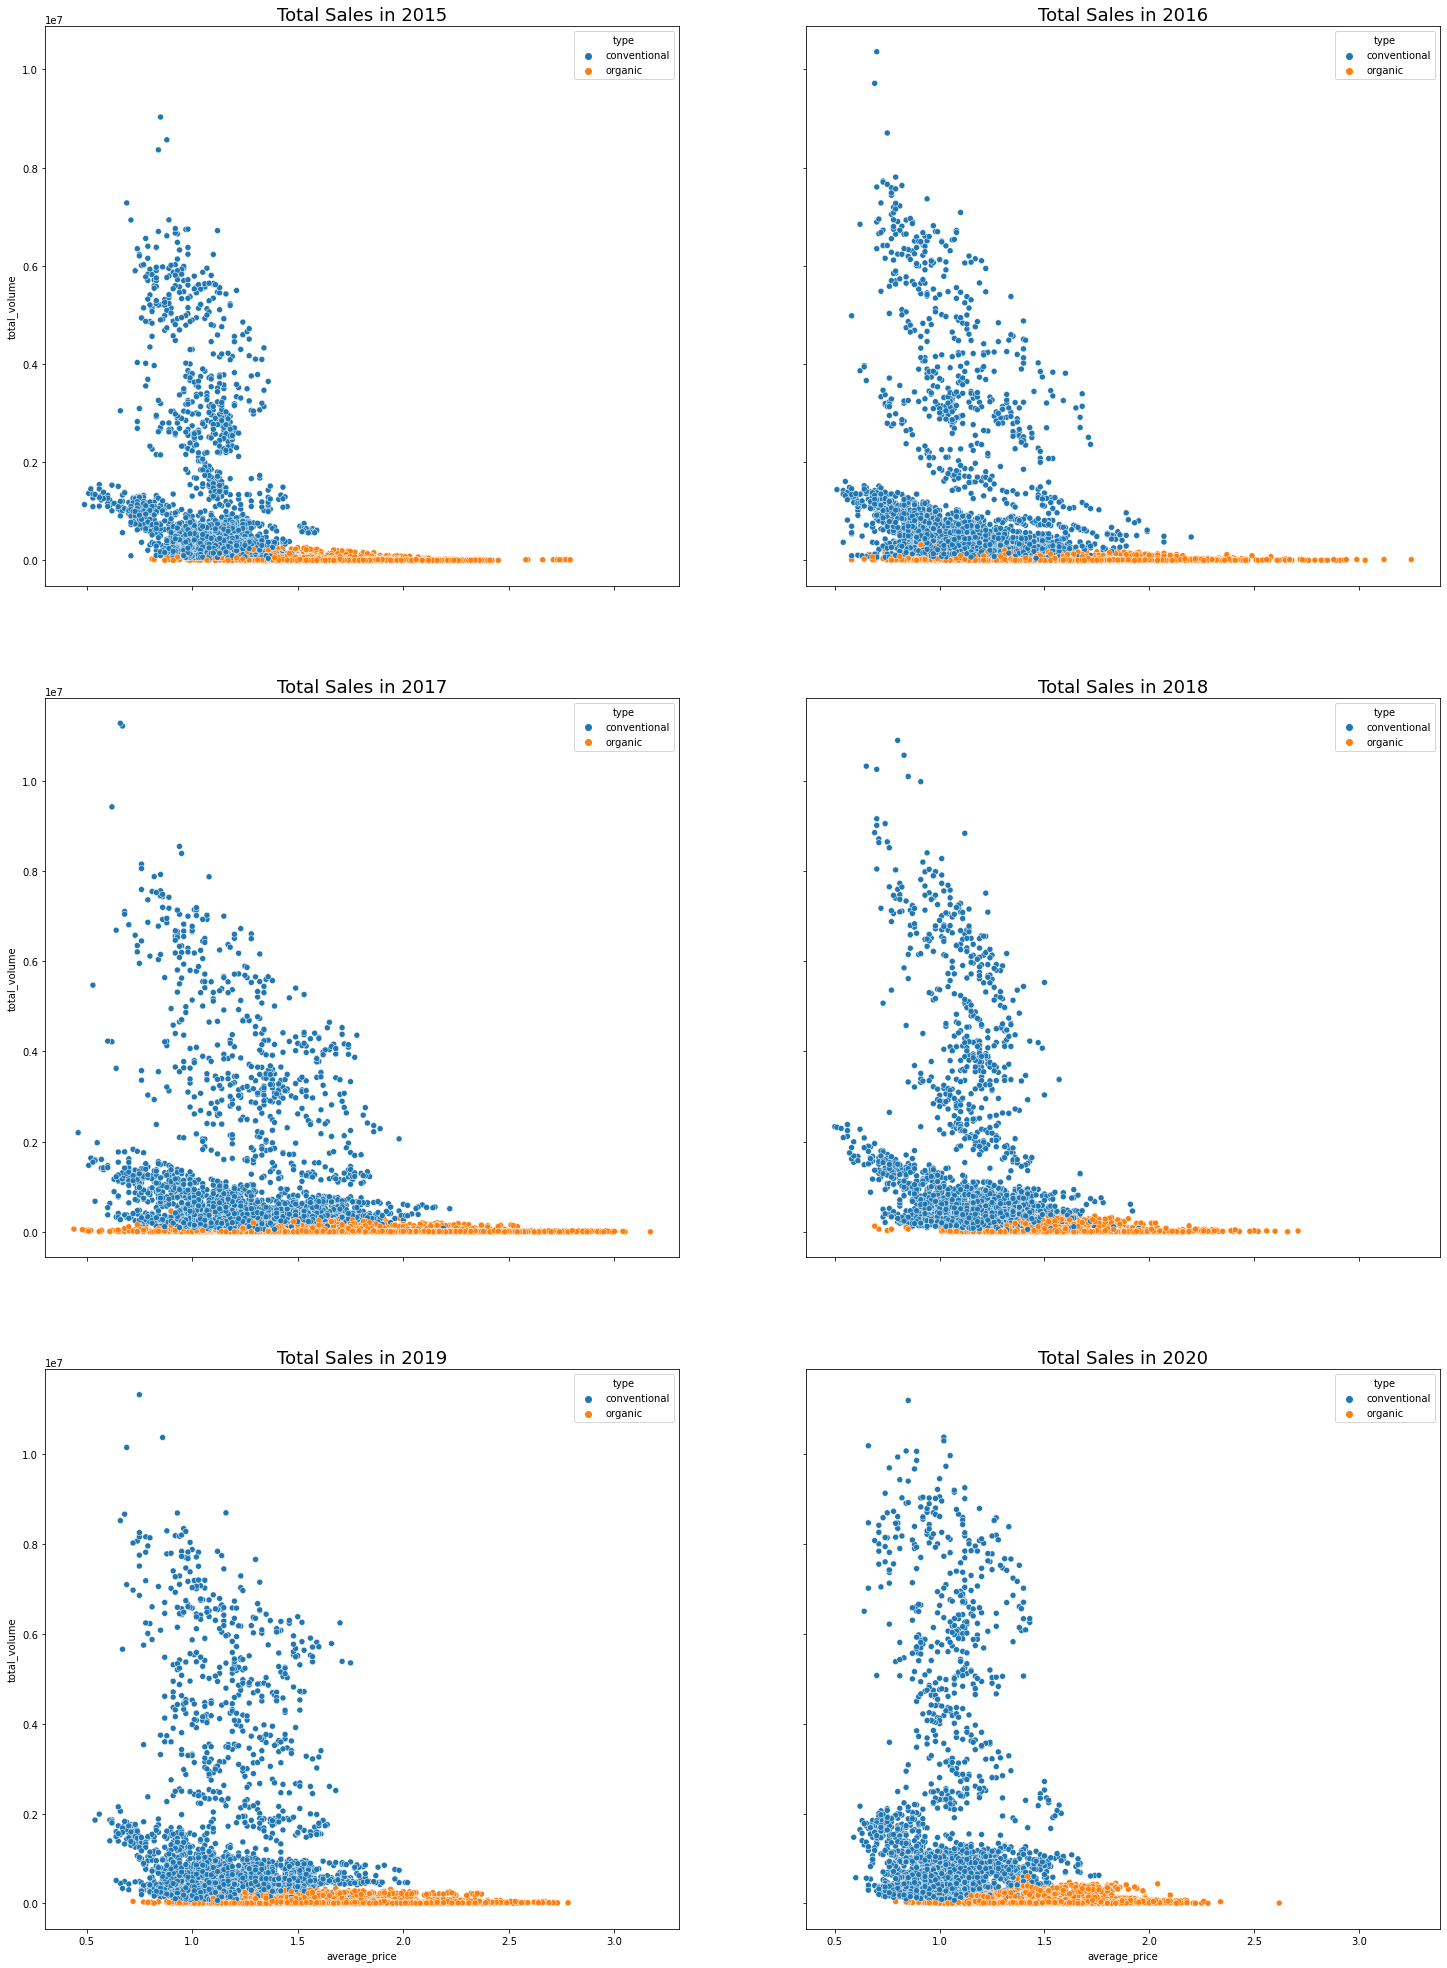

In [22]:
#Plot average price against total volume
fig, axs = plt.subplots(nrows=3, ncols=2,sharex='col', sharey='row', figsize=(25, 35))

plt2015 = sns.scatterplot(ax=axs[0, 0], x='average_price', y='total_volume', data=df[df['year'] == 2015], hue='type')
plt2015.set_title("Total Sales in 2015", fontsize = 18)
                       
plt2016 = sns.scatterplot(ax=axs[0, 1], x='average_price', y='total_volume', data=df[df['year'] == 2016], hue='type')
plt2016.set_title("Total Sales in 2016", fontsize = 18)

plt2017 = sns.scatterplot(ax=axs[1, 0], x='average_price', y='total_volume', data=df[df['year'] == 2017], hue='type')
plt2017.set_title("Total Sales in 2017", fontsize = 18)

plt2018 = sns.scatterplot(ax=axs[1, 1], x='average_price', y='total_volume', data=df[df['year'] == 2018], hue='type')
plt2018.set_title("Total Sales in 2018", fontsize = 18)

plt2019 = sns.scatterplot(ax=axs[2, 0], x='average_price', y='total_volume', data=df[df['year'] == 2019], hue='type')
plt2019.set_title("Total Sales in 2019", fontsize = 18)

plt2020 = sns.scatterplot(ax=axs[2, 1], x='average_price', y='total_volume', data=df[df['year'] == 2020], hue='type')
plt2020.set_title("Total Sales in 2020", fontsize = 18)

plt.show()

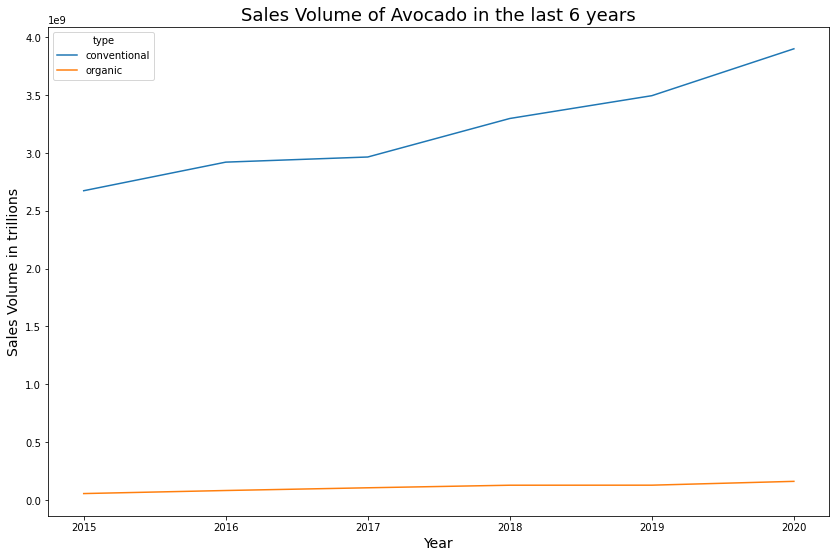

In [23]:
#Find out the trend of Avocado sales volume in the last 6 years
plt.figure(figsize=(14, 9))
sales_volume = df.groupby(['year','type'], as_index=False)['total_volume'].sum()

sv_plt = sns.lineplot(data=sales_volume, x="year", y="total_volume", hue="type")
sv_plt.set_title("Sales Volume of Avocado in the last 6 years", fontsize = 18)
sv_plt.set_xlabel("Year", fontsize = 14)
sv_plt.set_ylabel("Sales Volume in trillions", fontsize = 14)
plt.show()

#Seasons and its months in U.S.A
#Infomation extracted from https://www.visittheusa.com/info/weather-seasons
Spring: March to May
Summer: June to August 
Fall: September to November
Winter: December to February 

In [24]:
# create a list of our conditions
conditions = [
    (df['month'].isin([3,4,5])),
    (df['month'].isin([6,7,8])),
    (df['month'].isin([9,10,11])),
    (df['month'].isin([1,2,12]))
    ]

# create a list of the values we want to assign for each condition
values = ['spring', 'summer', 'fall', 'winter']

# create a new column and use np.select to assign values to it using our lists as arguments
df['season'] = np.select(conditions, values)

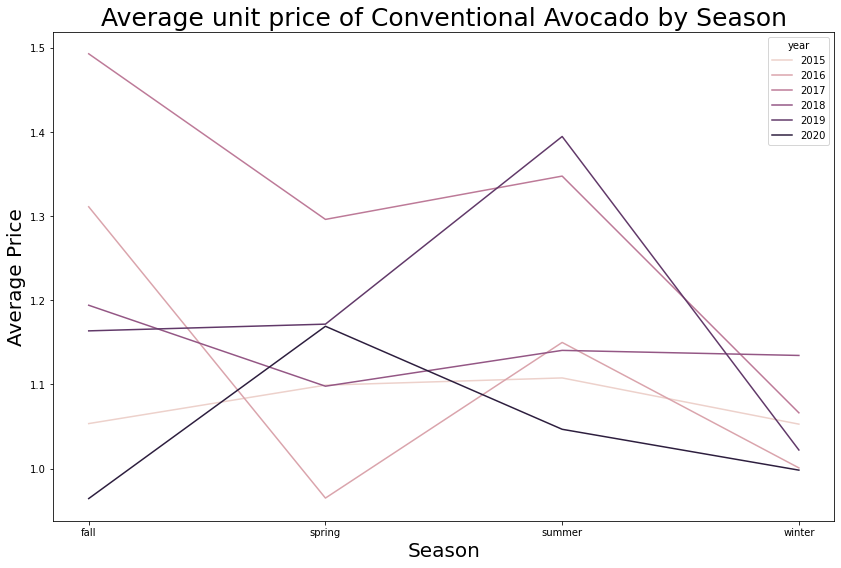

In [25]:
#Plot Average unit price of Conventional Avocado by Season

plt.figure(figsize=(14, 9))

avg_price_by_season = df.groupby(['season','type','year'], as_index=False)['average_price'].mean()

apbs = sns.lineplot(data=avg_price_by_season[avg_price_by_season['type']=='conventional'], x="season", y="average_price", hue="year")
apbs.set_xlabel("Season", fontsize = 20)
apbs.set_ylabel("Average Price", fontsize = 20)
apbs.set_title("Average unit price of Conventional Avocado by Season", fontsize = 25)
plt.show()

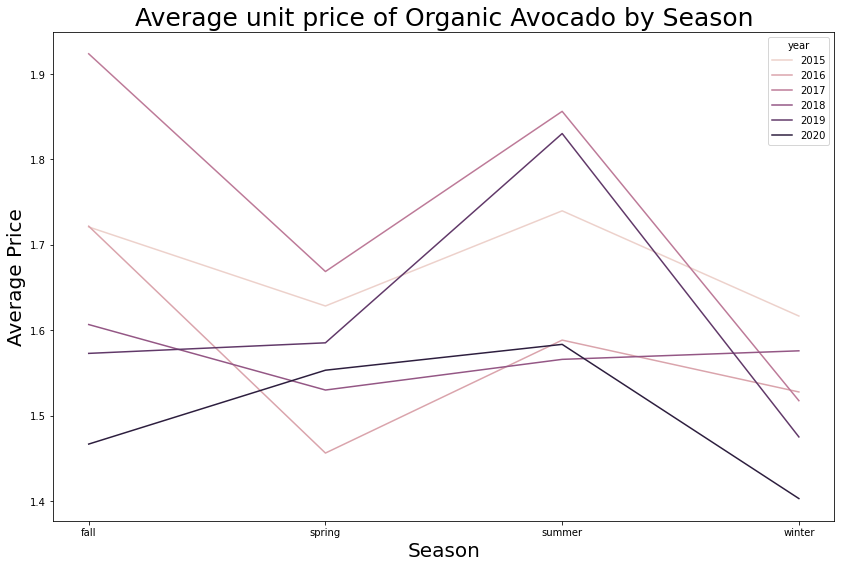

In [26]:
#Plot Average unit price of Organic Avocado by Season

plt.figure(figsize=(14, 9))
apbs = sns.lineplot(data=avg_price_by_season[avg_price_by_season['type']=='organic'], x="season", y="average_price", hue="year", sort = False)
apbs.set_xlabel("Season", fontsize = 20)
apbs.set_ylabel("Average Price", fontsize = 20)
apbs.set_title("Average unit price of Organic Avocado by Season", fontsize = 25)
plt.show()

In [27]:
#Convert Avocado Types to numerical values 
type_map = {
    'conventional' : 0 
    ,'organic' : 1
}

df['type'] = df['type'].map(type_map)

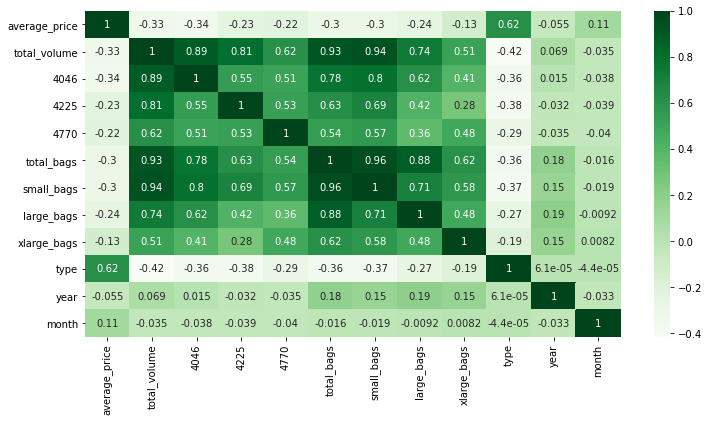

In [28]:
#Plot correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='Greens',annot=True)
plt.show()

# Data Modeling

In [29]:
#Create a new dataframe to include non-numerical fields
df_dummies = pd.get_dummies(df.drop(['geography','date'],axis=1),drop_first=True)

In [30]:
#Check the dataframe
df_dummies.head()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,month,season_spring,season_summer,season_winter
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,0,2015,1,0,0,1
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,1,2015,1,0,0,1
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,0,2015,1,0,0,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,1,2015,1,0,0,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,0,2015,1,0,0,1


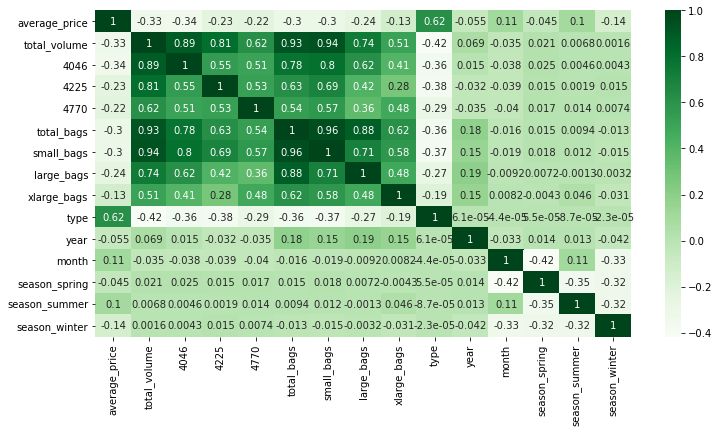

In [47]:
#Plot correlation
plt.figure(figsize=(12,6))
sns.heatmap(df_dummies.corr(),cmap='Greens',annot=True)
plt.show()

In [31]:
#Set target variable and feature variables
target_col = 'average_price'
feature_cols = [x for x in df_dummies.columns if x != target_col]

y = df_dummies[target_col]
X = df_dummies[feature_cols]

In [32]:
#Split the data set
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = 0.2, random_state=1)

#Create Linear Regression Model
lr = LinearRegression()

In [33]:
#Fit the mode
lr.fit(X_train, y_train)

LinearRegression()

In [34]:
#Score of the model
lr.score(X_test, y_test)

0.4380258606114942

In [35]:
#Check the mean squared error
from sklearn.metrics import mean_squared_error
y_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_pred))

0.08248157378178991


C:\Users\gerra\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of residuals')

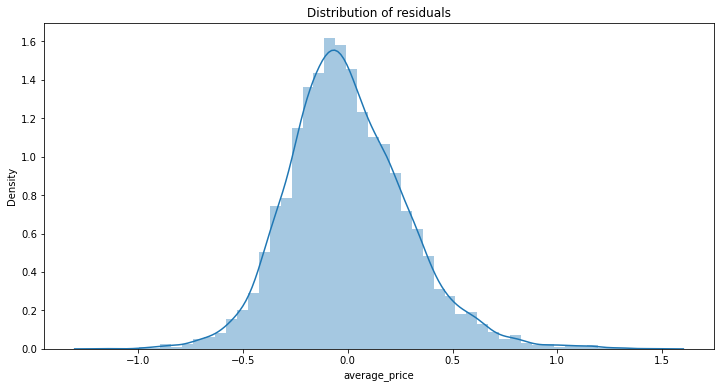

In [36]:
#Plot the distribution of residuals
plt.figure(figsize=(12,6))
sns.distplot(y_test - lr.predict(X_test))
plt.title('Distribution of residuals')

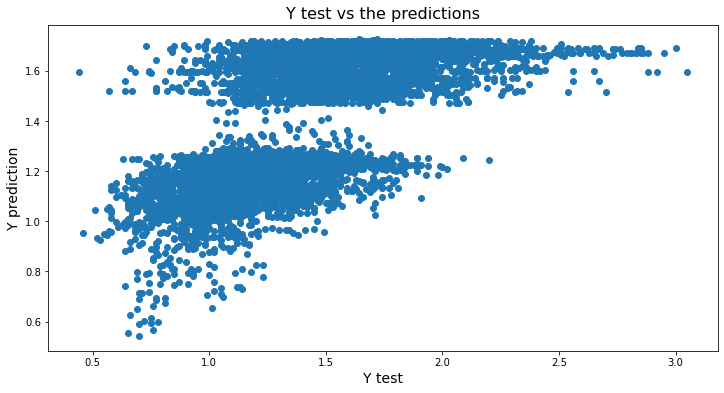

In [37]:
#Plot the predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
plt.xlabel('Y test', fontsize = 14)
plt.ylabel('Y prediction', fontsize = 14)
plt.title('Y test vs the predictions', fontsize = 16)
plt.show()

In [38]:
#Lasso model 
lasso = Lasso()
#Fit the model
lasso.fit(X_train, y_train)

C:\Users\gerra\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1508.3309932689117, tolerance: 0.3740557257307485
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [39]:
#Score of lasso model
lasso.score(X_test, y_test)

0.125990671070753

In [40]:
#MSE
y_pred_lasso = lasso.predict(X_test)
print(mean_squared_error(y_test, y_pred_lasso))

0.12827932799273012


Lasso picked 8 variables and eliminated the other 6 variables


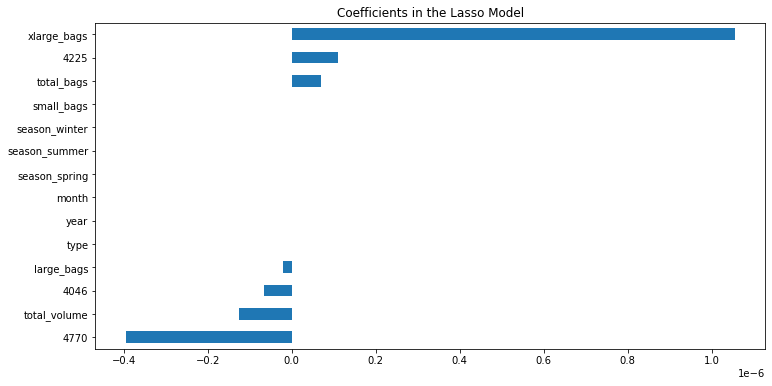

In [41]:
#Plot Coefficients in the Lasso Model
coef = pd.Series(lasso.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  
      str(sum(coef == 0)) + " variables")
plt.figure(figsize=(12,6))
imp_coef = pd.concat([coef.sort_values()])
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

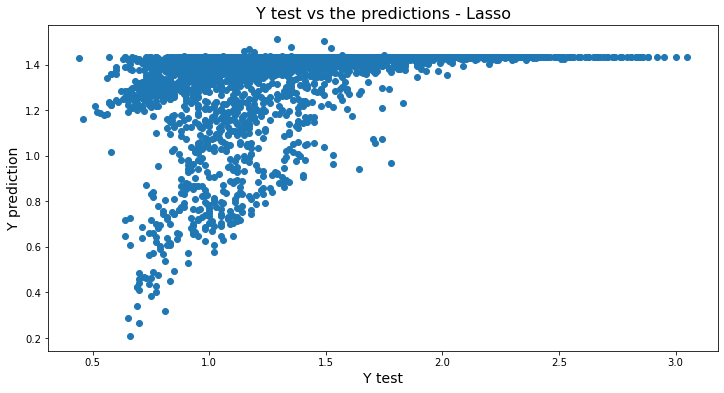

In [42]:
#Plot the predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_lasso)
plt.xlabel('Y test', fontsize = 14)
plt.ylabel('Y prediction', fontsize = 14)
plt.title('Y test vs the predictions - Lasso', fontsize = 16)
plt.show()

In [43]:
#Ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [44]:
#Score of ridge model
ridge.score(X_test, y_test)

0.43803135181988584

In [45]:
#MSE
y_pred_ridge = ridge.predict(X_test)
print(mean_squared_error(y_test, y_pred_ridge))

0.08248076783098476


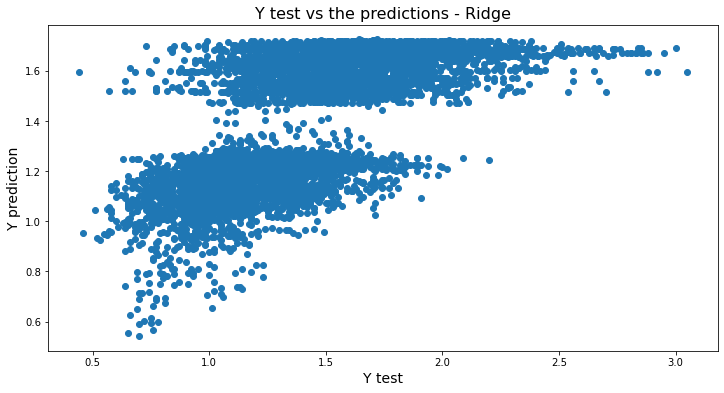

In [46]:
#Plot the predictions
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred_ridge)
plt.xlabel('Y test', fontsize = 14)
plt.ylabel('Y prediction', fontsize = 14)
plt.title('Y test vs the predictions - Ridge', fontsize = 16)
plt.show()

Feature 0: 3174.941775
Feature 1: 3409.323356
Feature 2: 1393.678968
Feature 3: 1301.721966
Feature 4: 2480.233256
Feature 5: 2532.987628
Feature 6: 1589.860660
Feature 7: 415.516490
Feature 8: 16022.030687
Feature 9: 95.548577
Feature 10: 303.546769
Feature 11: 43.694775
Feature 12: 258.814073
Feature 13: 516.360494


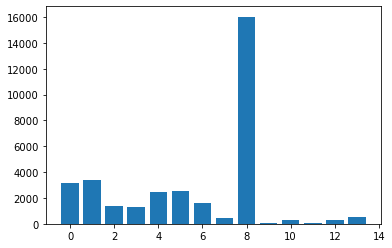

In [60]:
#Score the features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(X_train, y_train)
# transform train input data
X_train_fs = fs.transform(X_train)
# transform test input data
X_test_fs = fs.transform(X_test)

for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [68]:
#Set target variable and feature variables
target_col = 'average_price'
feature_cols_fs = ['total_volume', '4046', '4225', '4770', 'total_bags', 'small_bags','large_bags', 'type']

y_fs = df_dummies[target_col]
X_fs = df_dummies[feature_cols_fs]

#Split the data set
X_train_fs, X_test_fs, y_train_fs, y_test_fs= train_test_split(X_fs, y_fs, test_size = 0.2, random_state=1)

#Create Linear Regression Model
lr_fs = LinearRegression()

In [69]:
#Fit the model
lr_fs.fit(X_train, y_train)

LinearRegression()

In [70]:
#Score the model
lr_fs.score(X_test, y_test)

0.4380258606114942